<a href="https://colab.research.google.com/github/Adrxking/colabs/blob/main/Zalando_RedNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# https://www.kaggle.com/datasets/zalando-research/fashionmnist
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

In [12]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [13]:
train_images.shape

(60000, 28, 28)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
display(np.unique(train_labels))
display(np.unique(test_labels))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

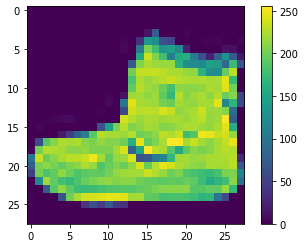

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

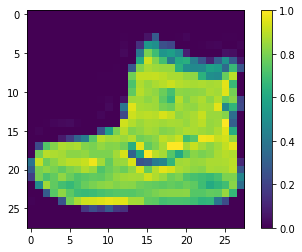

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

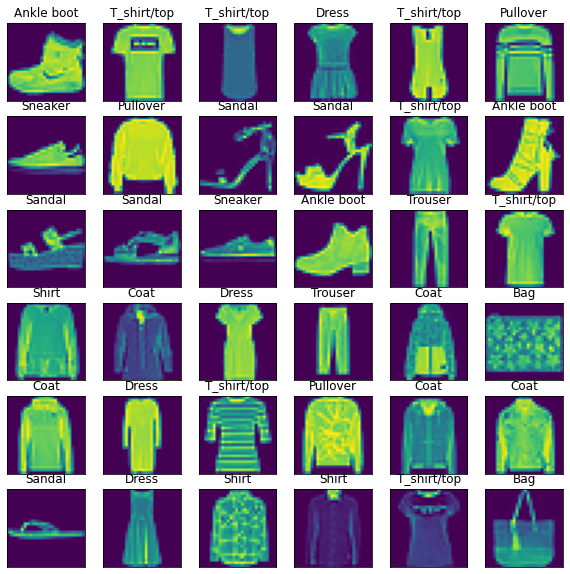

In [19]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28,28)))
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

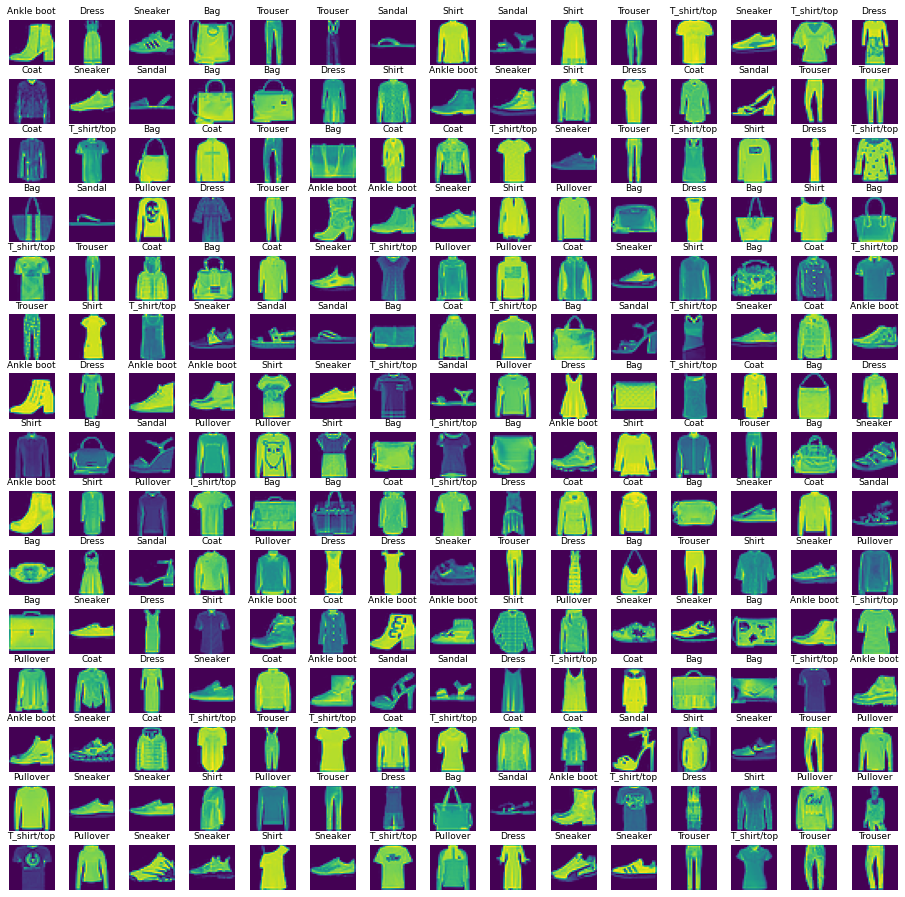

In [20]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_images) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_images[index].reshape((28,28)) )
    labelindex = int(train_labels[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

## Red Neuronal

In [30]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [31]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [32]:
# Crear modelo secuencial
model = Sequential([
  layers.Flatten(input_shape=(28, 28)),  # Convertir imagen en un vector unidimensional
  layers.Dense(128, activation='relu'), # Capa oculta con 128 neuronas
  layers.Dense(10)                      # Capa de salida con 10 neuronas correspondientes a las 10 clases de prendas
])

In [33]:
# Compilar modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
# Entrenar modelo
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.8824 - accuracy: 0.6895 - val_loss: 0.7652 - val_accuracy: 0.7508
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6539 - accuracy: 0.7628 - val_loss: 0.6395 - val_accuracy: 0.7654
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5796 - accuracy: 0.7933 - val_loss: 0.6795 - val_accuracy: 0.7731
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5683 - accuracy: 0.8038 - val_loss: 0.5899 - val_accuracy: 0.7996
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5416 - accuracy: 0.8129 - val_loss: 0.5645 - val_accuracy: 0.7981
Epoch 6/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5158 - accuracy: 0.8216 - val_loss: 0.5546 - val_accuracy: 0.8180
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5151 - accuracy: 0.8259 - val_loss: 0.5609 - val_accura

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5694 - accuracy: 0.8239 - 540ms/epoch - 2ms/step

Test accuracy: 0.8238999843597412


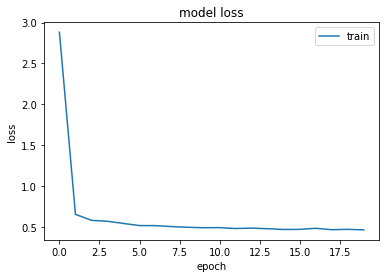

In [35]:
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

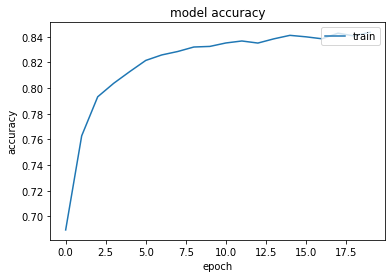

In [36]:
plt.plot(history.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()